## Zadanie 1 Sumowanie liczb pojedynczej precyzji

##### 1.  Napisz program, który oblicza sumęNliczb pojedynczej precyzji przechowywanychw tablicy o N= 10^7 elementach. Tablica wypełniona jest tą samą wartością v zprzedziału [0.1,0.9] np.v= 0.53125.

In [1]:
# importuję numpy'a aby mieć możliwość ustawienia precyzji
import numpy as np
# matplotlib do wykresu
import matplotlib.pyplot as plt
# moduł do mierzenia czasu
import time

# ustawiam aby liczby były pojedynczej precyzji
v = np.float32(0.53125)

N = (10**7)

# tworzę tablicę oraz akumulator, a następnie sumuję całość
tab = N * [v] 

def norm_alg(tab):
    
    sum1 = np.float32(0)
    
    for el in tab:
        sum1 += el
        
    return sum1

sum1 = norm_alg(tab)


print(sum1)

5030840.5


##### 2.  Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak duży?

In [2]:
# wartość oczekiwana
expected = np.float32(N * v)
print(expected)

# błąd bezwzględny 
abs_error = abs(sum1 - expected)
print(abs_error)

# błąd względny
rel_error = abs((sum1 - expected)/expected)
print(rel_error)



5312500.0
281659.5
0.053018257


###### Błąd względny jest tak duży (>5%) ponieważ błąd wynikający z dodawania liczb pojedynczej powiększa się wraz z kolejnymi operacjami dodawania liczb

##### 3.  W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

40


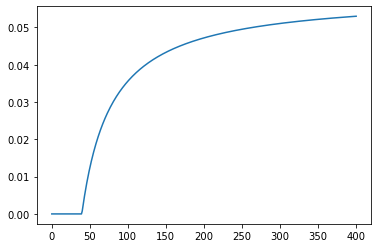

In [3]:
step = 25000
errors = [0] # błąd początkowo wynosi 0 

i = 0
sum1 = np.float32(0)

last_accurate = 0

for el in tab:
    sum1 += el
    
    i += 1
    if i == step:   # warunek sprawdzający czy należy pobrać statystykę
        if(errors[-1] == 0):
            last_accurate = len(errors)
        tmp_expected = np.float32(len(errors) * step * v)  # obliczanie tymczasowej wartości oczekiwanej
        errors.append(abs((sum1 - tmp_expected)/tmp_expected))
        i = 0
 
print(last_accurate)

plt.plot(errors)


###### Z analizy wykresu wynika, że błąd pojawia się po 40 pobraniu statystystyki, a więc do 10^6 operacji dodawania błąd nie wysepuje (wynik jest dokładny) (pojawia się w okolicach 10^6 operacji). Następnie błąd względny rośnie z malejącą prędkością przyrostu aż do osiągnięcia maximum ~5%. Błąd ten występuje ponieważ dodajemy (od pewnego momentu) dwie odległe od siebie liczby, a jako że komputer (precyzja 32-bit) nie jest w stanie zapamiętać całej liczby z częscią po przecinku,  ucina on ostatnie cyfry po przecinku, stąd błąd. Przyrost błędu względnego maleje z kolejnymi iteracjami, ponieważ błąd pojawiający się na kolejnych miejscach dziesiętnych rośnie wolniej od sumy. 

### 4.  Zaimplementuj rekurencyjny algorytm sumowania, działający jak na rysunku poniżej.

In [4]:
def rec_alg(tab):
    
    tab_len = len(tab) # aktualna ilość elementów tablicy
    
    if tab_len == 0:  # jeśli dostanie pustą tablicę
        return np.float32(0)
    
    elif tab_len == 1: # jeśli dostanie jednoelementową tablicę
        return tab[0]
    
    else:
        half_len = tab_len // 2   # jeśli elementów będzie więcej
        return rec_alg(tab[0:half_len]) + rec_alg(tab[half_len:tab_len])
    
sum2 = rec_alg(tab)
print(sum2)

5312500.0


### 5.  Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie zmalał?

In [5]:
# błąd bezwzględny 
abs_error2 = abs(sum2 - expected)
print(abs_error2)

# błąd względny
rel_error2 = abs((sum2 - expected)/expected)
print(rel_error2)

0.0
0.0


###### Błąd względny zmalał (a właściwie znikł), ponieważ w rekurencyjnym algorytmie dodajemy liczby zbliżone wielkością do siebie i nie występuje problem opisany w podpunkcie 5.

### 6.  Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [6]:
# pomiar czasu pierwszego algorytmu
start1 = time.time()
x1 = norm_alg(tab)
end1 = time.time()
print(end1 - start1)

0.8146655559539795


In [7]:
# pomiar czasu drugiego algorytmu
start2 = time.time()
x2 = rec_alg(tab)
end2 = time.time()
print(end2 - start2)

6.294005870819092


###### Rekurencyjny algorytm sumowania jest znacznie wolny od standardowego, natomiast niweluje błąd występujący przy dodawaniu odległych od siebie liczb.

### 7.  Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekuren-cyjnego zwraca niezerowy błąd.

In [8]:
# N = 67,  v = 5.0000005

x = np.float32(5.0000005)
arr = [x] * 67

sum3 = rec_alg(arr)

expected3 = np.float32(67) * x

print(sum3)
print(expected3)

335.00006
335.00003


In [9]:
# błąd bezwzględny 
abs_error3 = abs(sum3 - expected3)
print(abs_error3)

# błąd względny
rel_error3 = abs((sum3 - expected3)/expected3)
print(rel_error3)

3.0517578e-05
9.109724e-08


## Zadanie 2 Algorytm Kahana

In [10]:
def kahan_alg(tab):
    
    sum4 = np.float32(0)
    err = np.float32(0)
    
    for el in tab:
       
        y = el - err
        temp = sum4 + y
        err = (temp - sum4) - y
        sum4 = temp
    
    return sum4

### 1.  Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [11]:
sum4 = kahan_alg(tab)
expected4 = expected
sum5 = kahan_alg(arr)
expected5 = expected3


In [12]:
# błąd bezwzględny 
abs_error4 = abs(sum4 - expected4)
print(abs_error4)

# błąd względny
rel_error4 = abs((sum4 - expected4)/expected4)
print(rel_error4)

0.0
0.0


In [13]:
# błąd bezwzględny 
abs_error5 = abs(sum5 - expected5)
print(abs_error5)

# błąd względny
rel_error5 = abs((sum5 - expected5)/expected5)
print(rel_error5)

0.0
0.0


### 2.  Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne? Do czego służy zmienna err?

###### Algorytm Kahana ma dużo lepsze właściwości numeryczne, ponieważ z każdą iteracją liczy błąd dodawania, a następnie koryguje go w kolejnej iteracji. Zmienna err złuży do wyliczania błędu jaki powstał przy dodawaniu poprzez odjęcie od sumy (tymczasowej temp) dodawanych wartości. 

### 3.  Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [14]:
# pomiar czasu dla algorytmu rekurencyjnego
start3 = time.time()
x3 = rec_alg(tab)
end3 = time.time()
print(end3 - start3)

5.954902172088623


In [15]:
# pomiar czasu dla algorytmu Kahana
start4 = time.time()
x4 = kahan_alg(tab)
end4 = time.time()
print(end4 - start4)

2.9622628688812256


###### Z powyższych pomiarów wynika, że algorytm Kahana jest niemalże 2 razy szybszy od algorytmu rekurencyjnego, przy zachowaniu lepszych właściwości numerycznych

## Zadanie 3 Sumy częściowe

In [16]:
def dzeta_riemana(s, n):
    
    sum6 = np.float32(0)
    s = np.float32(s)
    one = np.float32(1)
    
    for k in range(1, n + 1):
        
        k = np.float32(k)
        sum6 += one / (k ** s)
    
    return sum6    

In [17]:
def eta_dirichleta(s, n):
    
    sum7 = np.float32(0)
    s = np.float32(s)
    one = np.float32(1)
    m_one = np.float32(-1)
    
    for k in range(1, n + 1):
        
        k = np.float32(k)
        sum7 += (m_one ** (k - one) ) * (one / (k ** s))
    
    return sum7  

In [18]:
# parametry
s5 = [2, 3.6667, 5, 7.2, 10]
n5 = [50, 100, 200, 500, 1000]

# przygotowanie miejsca na wyniki
res = [0,0,0,0,0]
results1 = []

for i in range(5):
    results1.append(res.copy())

results2 = results1.copy()
results3 = results1.copy()
results1_rev = results1.copy() # wyniki funkcji liczące w odwrotnej kolejności
results2_rev = results1.copy()
results1_norm = results1.copy() # norm == funkcja dla liczb podwójnej precyzji
results2_norm = results1.copy()
results1_norm_rev = results1.copy()
results2_norm_rev = results1.copy()

results1[1][1] = 2222

print(results2_norm_rev)


[[0, 0, 0, 0, 0], [0, 2222, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [19]:
# funkcja do wypisywania linia po linii
def print_res(results):
    for r in results:
        print(r)

# dzeta kolejność roznąca        
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results1[i][j] = dzeta_riemana(s,n)    

print_res(results1)        
        

[1.6251329, 1.634984, 1.6399467, 1.642936, 1.6439348]
[1.1093994, 1.1094086, 1.1094086, 1.1094086, 1.1094086]
[1.0369275, 1.0369275, 1.0369275, 1.0369275, 1.0369275]
[1.0072277, 1.0072277, 1.0072277, 1.0072277, 1.0072277]
[1.0009946, 1.0009946, 1.0009946, 1.0009946, 1.0009946]


In [20]:
# eta kolejność roznąca
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results2[i][j] = eta_dirichleta(s,n)  
        
print_res(results2)        

[0.822271, 0.8224175, 0.8224547, 0.82246536, 0.82246685]
[0.9346931, 0.9346933, 0.9346933, 0.9346933, 0.9346933]
[0.9721198, 0.9721198, 0.9721198, 0.9721198, 0.9721198]
[0.99352705, 0.99352705, 0.99352705, 0.99352705, 0.99352705]
[0.99903953, 0.99903953, 0.99903953, 0.99903953, 0.99903953]


In [21]:
def dzeta_riemana_rev(s, n): # funkcja dzeta z odwrotną kolejnością
    
    sum8 = np.float32(0)
    s = np.float32(s)
    one = np.float32(1)
    
    for k in range(n, 0, -1):
        
        k = np.float32(k)
        sum8 += one / (k ** s)

    return sum8


def eta_dirichleta_rev(s, n): # funkcja eta z odwrotną kolejnością
    
    sum9 = np.float32(0)
    s = np.float32(s)
    one = np.float32(1)
    m_one = np.float32(-1)
    
    for k in range(n, 0, -1):
        
        k += np.float32(k)
        sum9 = (m_one ** (k - one) ) * (one / (k ** s))
        
    
    return sum9 

In [22]:
# dzeta odwrotna kolejność        
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results1_rev[i][j] = dzeta_riemana_rev(s,n)    

print_res(results1_rev) 

[1.6251327, 1.6349839, 1.6399465, 1.642936, 1.6439345]
[1.1093998, 1.1094089, 1.1094103, 1.1094105, 1.1094105]
[1.0369277, 1.0369277, 1.0369277, 1.0369277, 1.0369277]
[1.0072277, 1.0072277, 1.0072277, 1.0072277, 1.0072277]
[1.0009946, 1.0009946, 1.0009946, 1.0009946, 1.0009946]


In [23]:
# eta odwrotna kolejność
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results2_rev[i][j] = eta_dirichleta_rev(s,n)  
        
print_res(results2_rev)  

[-0.25, -0.25, -0.25, -0.25, -0.25]
[-0.0787432524467266, -0.0787432524467266, -0.0787432524467266, -0.0787432524467266, -0.0787432524467266]
[-0.03125, -0.03125, -0.03125, -0.03125, -0.03125]
[-0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045]
[-0.0009765625, -0.0009765625, -0.0009765625, -0.0009765625, -0.0009765625]


In [24]:
def norm_dzeta(s, n): # funkcja dzeta dla liczb podwójnej precyzji (kolejność rosnąca)
    
    sum10 = 0
    
    for k in range(1, n + 1):
        sum10 += 1 / (k ** s)
    
    return sum10

In [25]:
def norm_eta(s, n): # funkcja eta dla liczb podwójnej precyzji (kolejność malejąca)
    
    sum11 = 0
    
    for k in range(1, n + 1):
        sum11 += ((-1) ** (k - 1) ) * (1 / (k ** s))
    
    return sum11  

In [26]:
# dzeta normalna kolejność, liczby podwójnej precyzji    
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results1_norm[i][j] = norm_dzeta(s,n)    

print_res(results1_norm) 

[1.625132733621529, 1.6349839001848923, 1.6399465460149971, 1.642936065514894, 1.6439345666815615]
[1.1093997551541945, 1.1094087973421474, 1.1094102423332313, 1.1094104908440712, 1.1094105108423578]
[1.036927716716712, 1.0369277526929555, 1.0369277549886775, 1.0369277551393863, 1.0369277551431222]
[1.0072276664762816, 1.007227666480654, 1.0072276664807145, 1.0072276664807145, 1.0072276664807145]
[1.0009945751278182, 1.0009945751278182, 1.0009945751278182, 1.0009945751278182, 1.0009945751278182]


In [27]:
# eta normalna kolejność, liczby podwójnej precyzji      
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results2_norm[i][j] = norm_eta(s,n)    

print_res(results2_norm) 

[0.8222710318260295, 0.8224175333741286, 0.822454595922551, 0.8224650374240963, 0.8224665339241114]
[0.9346930600307106, 0.9346933211400662, 0.9346933421086845, 0.9346933438558745, 0.9346933439141353]
[0.9721197689267979, 0.9721197703981592, 0.972119770445367, 0.9721197704468947, 0.9721197704469091]
[0.9935270006613486, 0.9935270006616185, 0.9935270006616201, 0.9935270006616201, 0.9935270006616201]
[0.9990395075982718, 0.9990395075982718, 0.9990395075982718, 0.9990395075982718, 0.9990395075982718]


In [28]:
def norm_dzeta_rev(s, n):  # funkcja dzeta dla liczb podwójnej precyzji (odwrotna kolejność)
    
    sum12 = 0
    
    for k in range(n, 0, -1):
        sum12 += 1 / (k ** s)
    
    return sum12

In [29]:
def norm_eta_rev(s, n):  # funkcja eta dla liczb podwójnej precyzji (odwrotna kolejność)
    
    sum13 = 0
    
    for k in range(n, 0, -1):
        sum13 += ( (-1) ** (k - 1) ) * (1 / (k ** s))
    
    return sum13  

In [30]:
# dzeta odwrotna kolejność, liczby podwójnej precyzji        
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results1_norm_rev[i][j] = norm_dzeta_rev(s,n)    

print_res(results1_norm_rev) 

[1.6251327336215293, 1.634983900184893, 1.6399465460149973, 1.6429360655148941, 1.6439345666815597]
[1.1093997551541943, 1.1094087973421476, 1.109410242333231, 1.1094104908440725, 1.1094105108423593]
[1.0369277167167108, 1.0369277526929532, 1.036927754988676, 1.0369277551393858, 1.0369277551431204]
[1.0072276664762823, 1.007227666480655, 1.0072276664807163, 1.0072276664807172, 1.0072276664807172]
[1.000994575127818, 1.000994575127818, 1.000994575127818, 1.000994575127818, 1.000994575127818]


In [31]:
# eta odwrotna kolejność liczby podwójnej precyzji      
for i,s in enumerate(s5):
    for j,n in enumerate(n5):
        results2_norm_rev[i][j] = norm_eta_rev(s,n)    

print_res(results2_norm_rev)

[0.8222710318260289, 0.8224175333741282, 0.8224545959225509, 0.8224650374240972, 0.8224665339241127]
[0.934693060030711, 0.934693321140067, 0.9346933421086852, 0.934693343855875, 0.9346933439141354]
[0.9721197689267976, 0.9721197703981589, 0.9721197704453663, 0.9721197704468933, 0.9721197704469088]
[0.9935270006613481, 0.9935270006616179, 0.9935270006616198, 0.9935270006616198, 0.9935270006616198]
[0.9990395075982715, 0.9990395075982715, 0.9990395075982715, 0.9990395075982715, 0.9990395075982715]


###### dzeta, pojedyncza precyzja, normalna kolejność

[1.6251329, 1.634984, 1.6399467, 1.642936, 1.6439348]
[1.1093994, 1.1094086, 1.1094086, 1.1094086, 1.1094086]
[1.0369275, 1.0369275, 1.0369275, 1.0369275, 1.0369275]
[1.0072277, 1.0072277, 1.0072277, 1.0072277, 1.0072277]
[1.0009946, 1.0009946, 1.0009946, 1.0009946, 1.0009946]

###### dzeta, pojedyncza precyzja, odwrotna kolejność

[1.6251327, 1.6349839, 1.6399465, 1.642936, 1.6439345]
[1.1093998, 1.1094089, 1.1094103, 1.1094105, 1.1094105]
[1.0369277, 1.0369277, 1.0369277, 1.0369277, 1.0369277]
[1.0072277, 1.0072277, 1.0072277, 1.0072277, 1.0072277]
[1.0009946, 1.0009946, 1.0009946, 1.0009946, 1.0009946]

###### dzeta, podwójna precyzja, normalna kolejność

[1.625132733621529, 1.6349839001848923, 1.6399465460149971, 1.642936065514894, 1.6439345666815615]
[1.1093997551541945, 1.1094087973421474, 1.1094102423332313, 1.1094104908440712, 1.1094105108423578]
[1.036927716716712, 1.0369277526929555, 1.0369277549886775, 1.0369277551393863, 1.0369277551431222]
[1.0072276664762816, 1.007227666480654, 1.0072276664807145, 1.0072276664807145, 1.0072276664807145]
[1.0009945751278182, 1.0009945751278182, 1.0009945751278182, 1.0009945751278182, 1.0009945751278182]

###### dzeta, podwójna precyzja, odwrotna kolejność

[1.6251327336215293, 1.634983900184893, 1.6399465460149973, 1.6429360655148941, 1.6439345666815597]
[1.1093997551541943, 1.1094087973421476, 1.109410242333231, 1.1094104908440725, 1.1094105108423593]
[1.0369277167167108, 1.0369277526929532, 1.036927754988676, 1.0369277551393858, 1.0369277551431204]
[1.0072276664762823, 1.007227666480655, 1.0072276664807163, 1.0072276664807172, 1.0072276664807172]
[1.000994575127818, 1.000994575127818, 1.000994575127818, 1.000994575127818, 1.000994575127818]

###### eta, pojedyncza precyzja, normalna kolejność

[0.822271, 0.8224175, 0.8224547, 0.82246536, 0.82246685]
[0.9346931, 0.9346933, 0.9346933, 0.9346933, 0.9346933]
[0.9721198, 0.9721198, 0.9721198, 0.9721198, 0.9721198]
[0.99352705, 0.99352705, 0.99352705, 0.99352705, 0.99352705]
[0.99903953, 0.99903953, 0.99903953, 0.99903953, 0.99903953]

###### eta, pojedyncza precyzja, odwrotna kolejność

[-0.25, -0.25, -0.25, -0.25, -0.25]
[-0.0787432524467266, -0.0787432524467266, -0.0787432524467266, -0.0787432524467266, -0.0787432524467266]
[-0.03125, -0.03125, -0.03125, -0.03125, -0.03125]
[-0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045, -0.0068011771749164045]
[-0.0009765625, -0.0009765625, -0.0009765625, -0.0009765625, -0.0009765625]

###### eta, podwójna precyzja, normalna kolejność

[0.8222710318260295, 0.8224175333741286, 0.822454595922551, 0.8224650374240963, 0.8224665339241114]
[0.9346930600307106, 0.9346933211400662, 0.9346933421086845, 0.9346933438558745, 0.9346933439141353]
[0.9721197689267979, 0.9721197703981592, 0.972119770445367, 0.9721197704468947, 0.9721197704469091]
[0.9935270006613486, 0.9935270006616185, 0.9935270006616201, 0.9935270006616201, 0.9935270006616201]
[0.9990395075982718, 0.9990395075982718, 0.9990395075982718, 0.9990395075982718, 0.9990395075982718]

###### eta, podwójna precyzja, odwrotna kolejność

[0.8222710318260289, 0.8224175333741282, 0.8224545959225509, 0.8224650374240972, 0.8224665339241127]
[0.934693060030711, 0.934693321140067, 0.9346933421086852, 0.934693343855875, 0.9346933439141354]
[0.9721197689267976, 0.9721197703981589, 0.9721197704453663, 0.9721197704468933, 0.9721197704469088]
[0.9935270006613481, 0.9935270006616179, 0.9935270006616198, 0.9935270006616198, 0.9935270006616198]
[0.9990395075982715, 0.9990395075982715, 0.9990395075982715, 0.9990395075982715, 0.9990395075982715]

###### Powyższe wyniki wskazują, na różnicę w precyzji sumowania ciągów w zależności czy zaczynamy od najmniejszego elementu, czy od największego (wartość absolutna). Po porównaniu wyników dla pojedynczej precyzji do wyników dla podwójnej precyzji możemy wywnieskować, żę gdy zaczynamy sumowanie od liczb największych (wariant "normalny"/rosnący indeks), precyzja wydaje się być mniejsza w porównaniu, gdy robimy to z odwrotną kolejnością. To gubienie precyzji (znaczących wartości po przecinku), w ekstremalnych warunkach (odwrotne sumowanie liczb pojedynczej precyzji dla ety) może spowodować, że otrzymane warunki będą miały kompletnie inny znak.

##### fl(fl(x + y) + z) = (**)
##### fl(x + y) = (x + y)(1 + e1) [e1 <- błąd reprezentacji]
##### fl( fl(x + y) + z) = (fl(x + y) + z)(1 + e2) [e2 <- błąd reprezentacji]
##### (**) = ((x + y)(1 + e1) + z)(1 + e2) = (x + y + z + (x + y)(e1))(1 + e2) =
##### = (x + y + z) (1 + ((x + y)/(x + y + z))(e1)(1 + e2) + e2)     {1*}
##### wyliczjac nastepnie fl(fl( x + y) + z) = (x + y + z) (1 + e3) [e3 <- błąd reprezentacji] {2*}
##### można wyliczyć, że e3 = ( (x + y)/(x + y + z) ) (e1) + e2 z {1*} i {2*}
##### analogicznie mozna wyliczyc to dla fl(x + fl(y + z)) = (x + y + z)(1 + e4) [e4 <- błąd]
##### otrzymujemy wówczas e4 = ( (y + z)/(x + y + z) )(e1) + e2
##### błąd więc zależy od wielkości (x + y) i (y + z)
##### jesli |x + y| < |y + z| => możemys stwierdzić, że sumowanie powiniśmy rozpocząć od (x + y)